### Problem 1

The AMS simulations vs this tend to produce such and such spreads

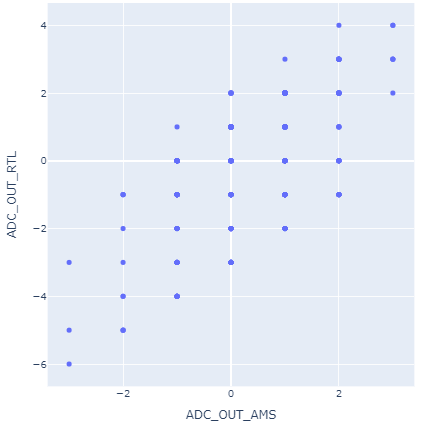

which is really bad.

Turns out, this is because I use binary weights in the reference RTL while the AMS is in bipolar mode.
Let's see if that actually turns out to be the same spread.

Findings
* w_bin and w_bip are the exact same data-wise. seed works.
* The spread looks like this

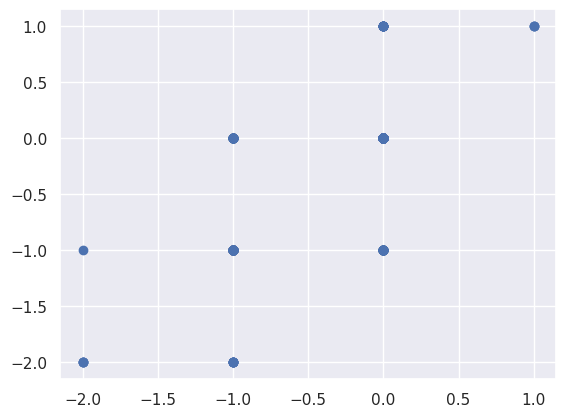

In [2]:
import hwacctools.quantization.quant as q
from stim_lib.stimulus_gen import generate_qracc_inputs
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.DataFrame

w,x,wx_outBits = generate_qracc_inputs(
    wDimX = 32, #nColumns
    wDimY = 128, #nRows
    xBatches = 10,
    xTrits = 4,
    outBits = 4,
    seed = 0,
    weight_mode = 'bipolar',
    col_symmetric=False
)

df(w @ x.T)
x.shape

[STIM_GEN] Generating random weights


(10, 128)